In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from babel.numbers import format_currency
import streamlit as st

sns.set(style='dark')

In [6]:
df = pd.read_csv('all_data.csv')

In [7]:
# helper function

# group by order_date
def create_daily_order_df(df):
  daily_order_df = df.resample(rule='D', on='order_date').agg({
      'order_id':'nunique',
      'total_price':'sum'
  })
  daily_order_df = daily_order_df.reset_index()
  daily_order_df.rename(columns={
      'order_id':'order_count',
      'total_price':'revenue'
  }, inplace=True)
  return daily_order_df

# group by product_name
def create_sum_order_items_df(df):
  sum_order_items_df = df.groupby('product_name').quantity_x.sum().sort_values(ascending=False).reset_index()
  return sum_order_items_df

# group by gender
def create_bygender_df(df):
  bygender_df = df.groupby(by='gender').customer_id.nunique().reset_index()
  bygender_df.rename(columns={
      'customer_id':'customer_count'
  }, inplace=True)
  return bygender_df

# group by age_group
def create_byage_df(df):
  byage_df = df.groupby(by='age_group').customer_id.nunique().reset_index()
  byage_df.rename(columns={
      'customer_id':'customer_count'
  }, inplace=True)
  byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ['Youth', 'Adults', 'Senior'])
  return byage_df

# group by state
def create_bystate_df(df):
  bystate_df = df.groupby(by='state').customer_id.nunique().reset_index()
  bystate_df.rename(columns={
      'customer_id':'customer_count'
  }, inplace=True)
  return bystate_df

# rfm
def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_id", as_index=False).agg({
        "order_date": "max", #mengambil tanggal order terakhir
        "order_id": "nunique",
        "total_price": "sum"
    })
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    
    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_date"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
    
    return rfm_df

In [8]:
datetime_colum = ['delivery_date', 'order_date']
df.sort_values(by='order_date', inplace=True)
df.reset_index()

for colum in datetime_colum:
  df[colum] = pd.to_datetime(df[colum])

In [9]:
# membuat komponen filter
min_date = df['order_date'].min()
max_date = df['order_date'].max()

with st.sidebar:
  # menambahkan logo perusahan
  st.image('https://github.com/dicodingacademy/assets/raw/main/logo.png')

  # mengambil start_date & end_date dari date_input
  start_date, end_date = st.date_input(
      label='Rentang waktu', 
      min_value=min_date,
      max_value = max_date,
      value=[min_date, max_date]
  )

  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-03-31 21:08:11.108 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [10]:
main_df = df[(df['order_date'] >= str(start_date)) & 
             (df['order_date'] <= str(end_date))]

In [11]:
daily_order_df = create_daily_order_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
bygender_df = create_bygender_df(main_df)
byage_df = create_byage_df(main_df)
bystate_df = create_bystate_df(main_df)
rfm_df = create_rfm_df(main_df)

In [12]:
st.header('Dicoding Collection Dashboard :sparkles:')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

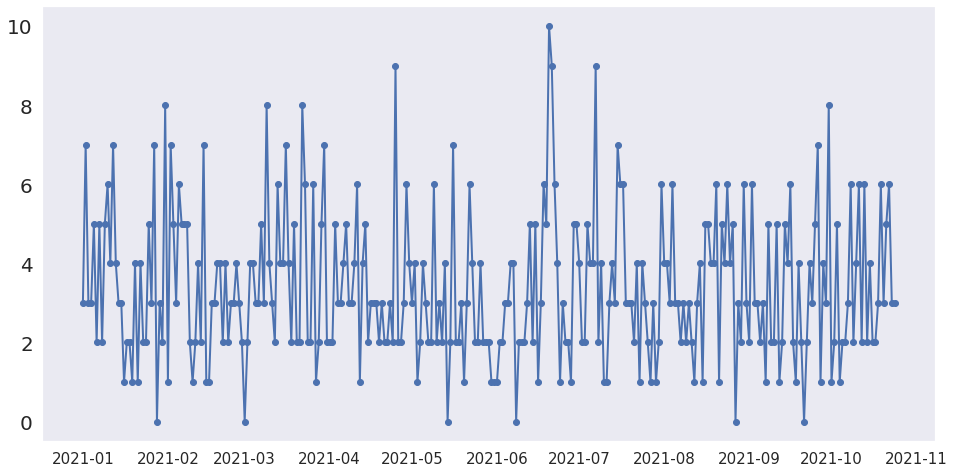

In [13]:
st.subheader('Daily Orders')

col1, col2 = st.columns(2)

with col1:
  total_orders = daily_order_df.order_count.sum()
  st.metric("Total orders", value=total_orders)

with col2:
  total_revenue = format_currency(daily_order_df.revenue.sum(), 'AUD', locale='es_CO')
  st.metric("Total Revenue", value=total_revenue)

fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    daily_order_df['order_date'],
    daily_order_df['order_count'],
    marker='o',
    linewidth=2
)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=15)

st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

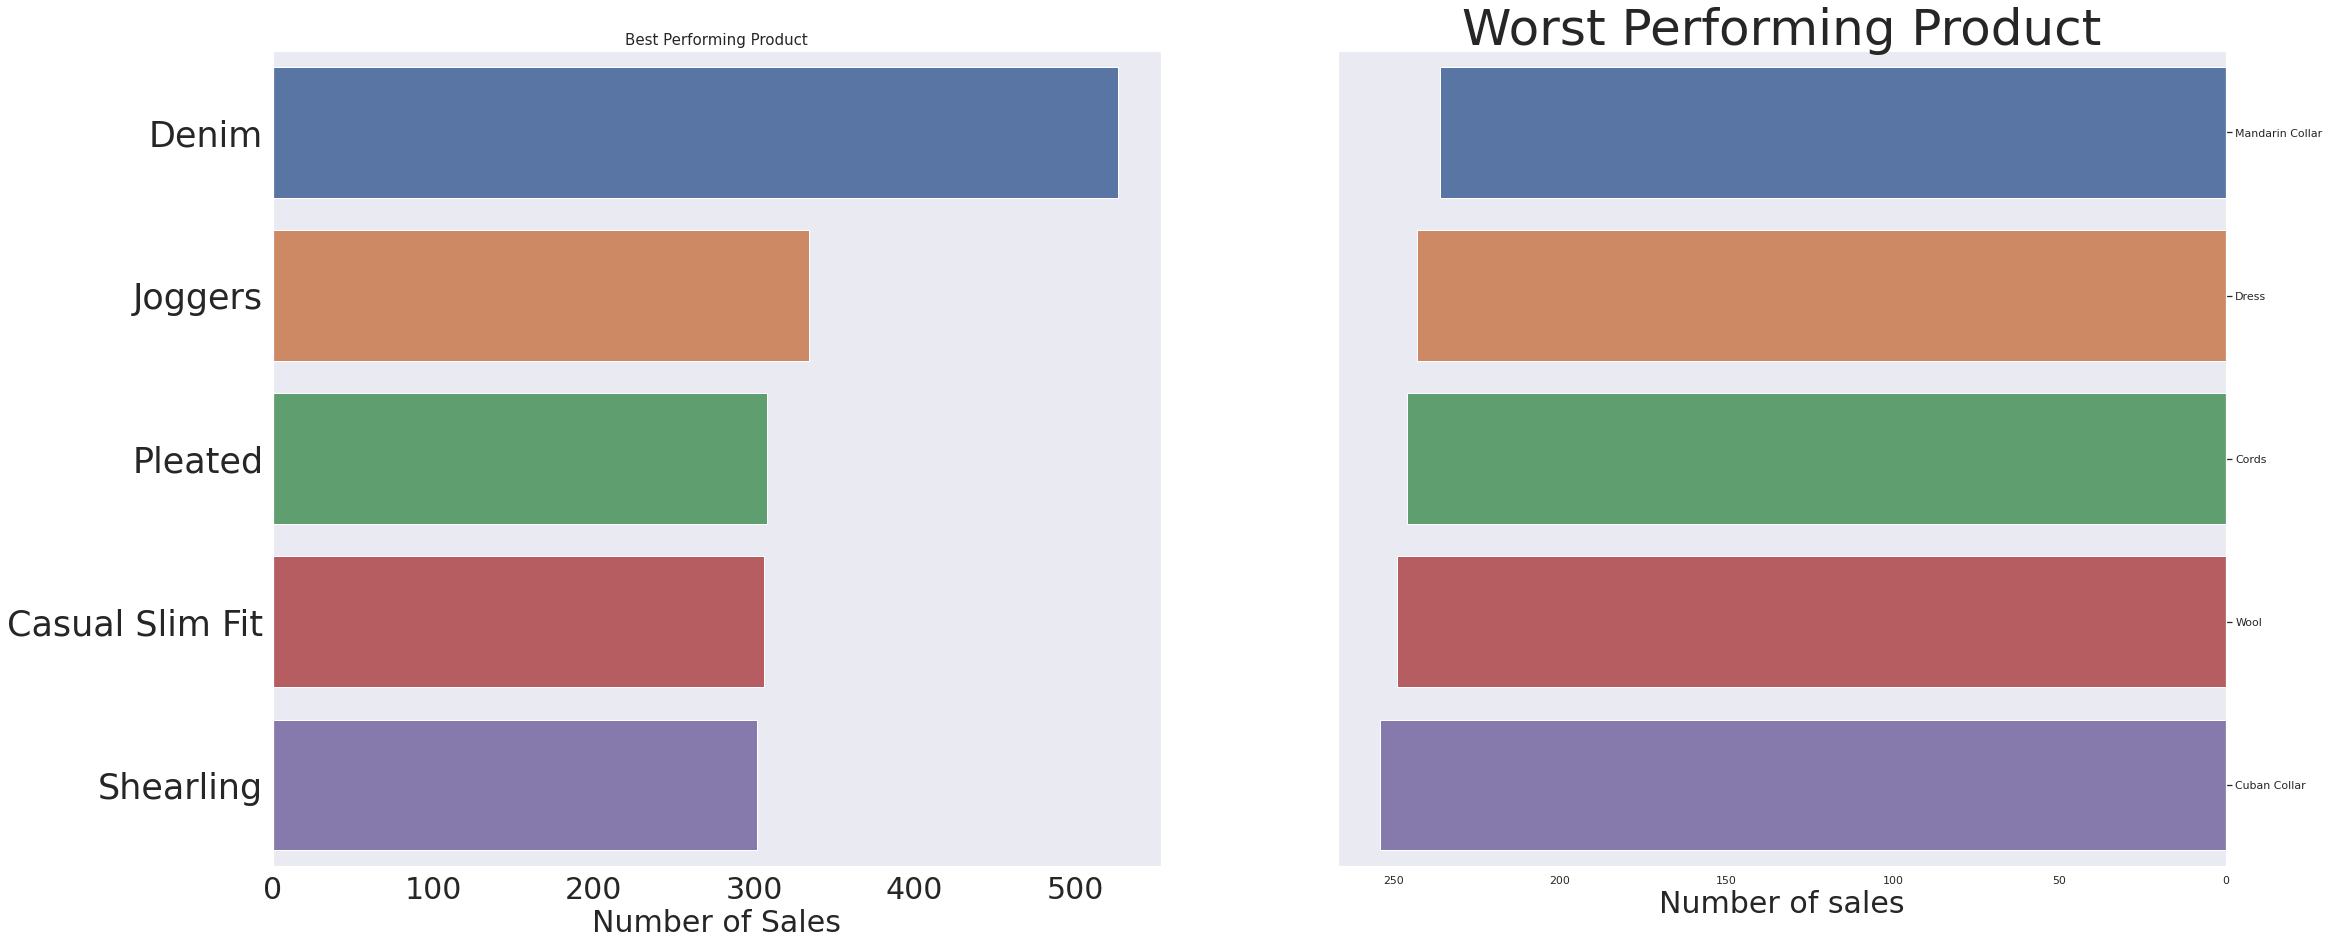

In [14]:
st.subheader('Best & Worst Performing Product')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.head(), ax=ax[0])
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel('Number of Sales', fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.sort_values(by='quantity_x', ascending=True).head(), ax=ax[1])
ax[1].set_title('Worst Performing Product', loc='center', fontsize=50)
ax[1].set_xlabel('Number of sales', fontsize=30)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

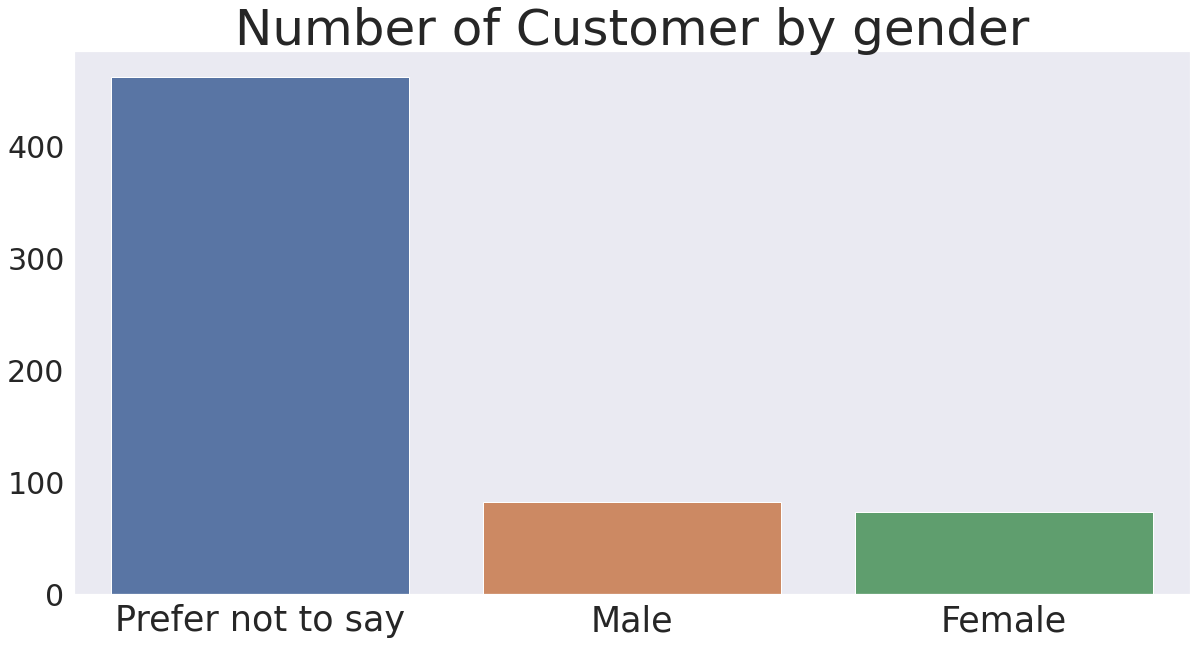

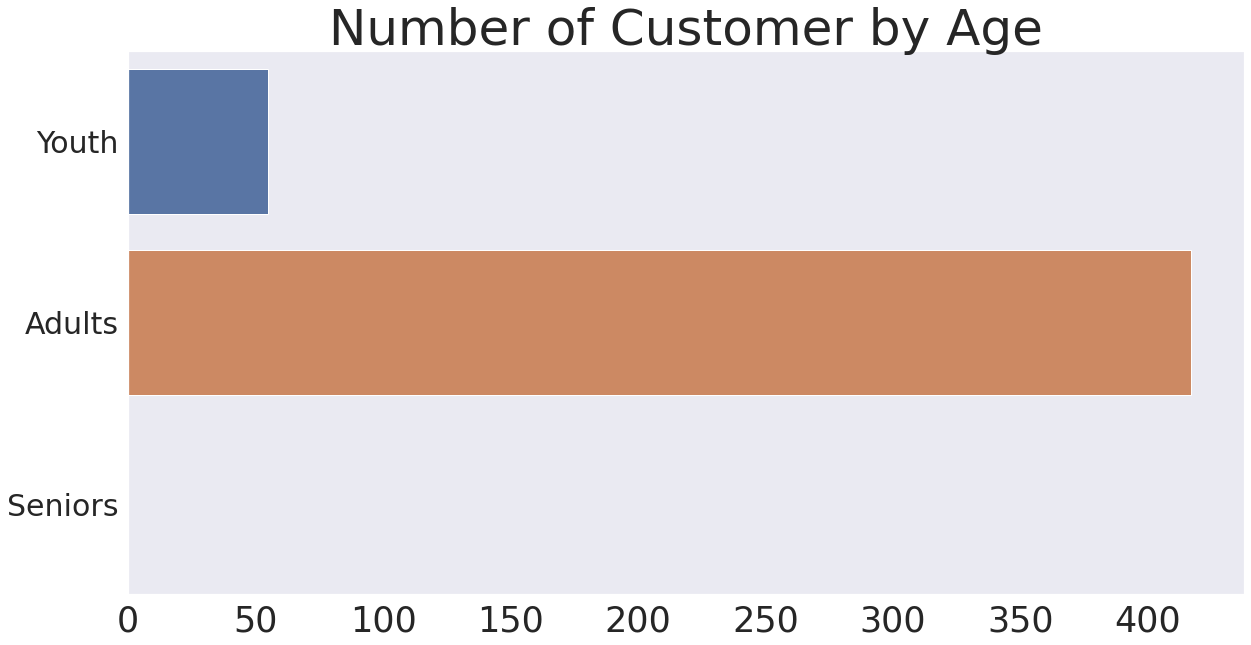

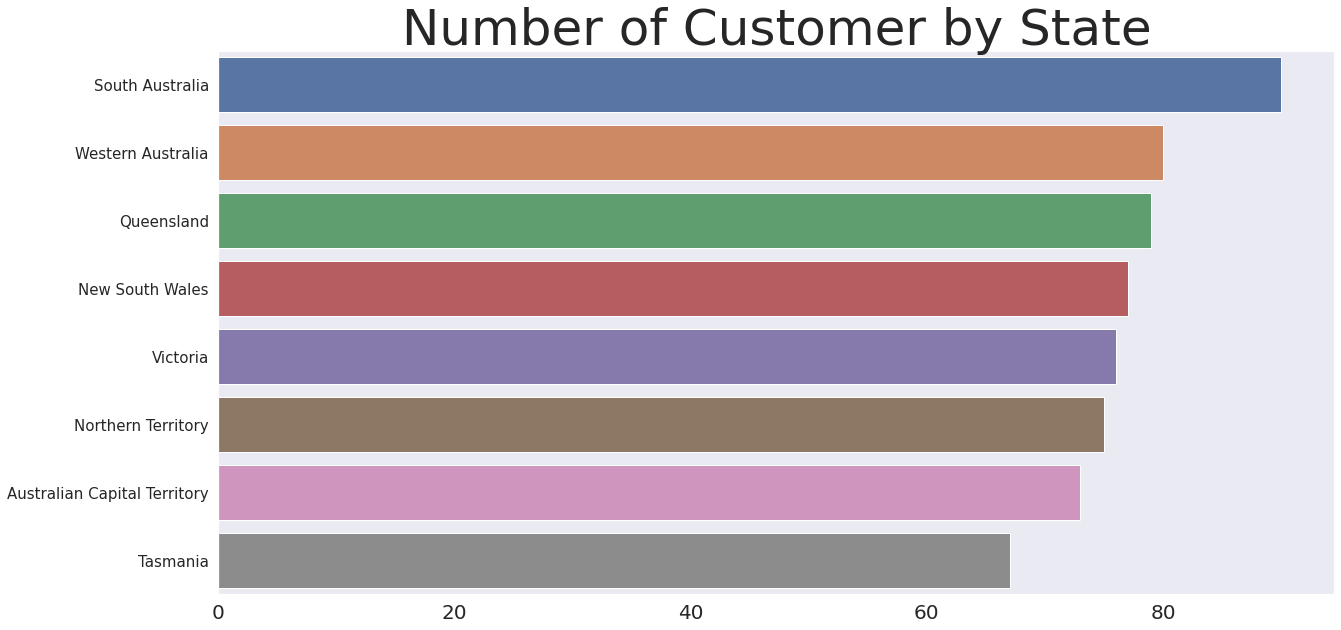

In [15]:
st.subheader('Customer Demographics')

col1, col2 = st.columns(2)

with col1:
  fig, ax = plt.subplots(figsize=(20, 10))

  sns.barplot(
      y='customer_count',
      x='gender',
      data=bygender_df.sort_values(by='customer_count', ascending=False),
      ax=ax
  )
  ax.set_title('Number of Customer by gender', fontsize=50, loc='center')
  ax.set_ylabel(None)
  ax.set_xlabel(None)
  ax.tick_params(axis='x', labelsize=35)
  ax.tick_params(axis='y', labelsize=30)
  st.pyplot(fig)

with col2:
  fig, ax = plt.subplots(figsize=(20, 10))

  sns.barplot(
      x='customer_count',
      y='age_group',
      data=byage_df.sort_values(by='age_group', ascending=False),
      ax= ax
  )
  ax.set_title('Number of Customer by Age', fontsize=50, loc='center')
  ax.set_xlabel(None)
  ax.set_ylabel(None)
  ax.tick_params(axis='x', labelsize=35)
  ax.tick_params(axis='y', labelsize=30)
  st.pyplot(fig)

fig, ax= plt.subplots(figsize=(20,10))
sns.barplot(
    x='customer_count',
    y='state',
    data=bystate_df.sort_values(by='customer_count', ascending=False),
    ax = ax
)
ax.set_title('Number of Customer by State', fontsize=50, loc='center')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

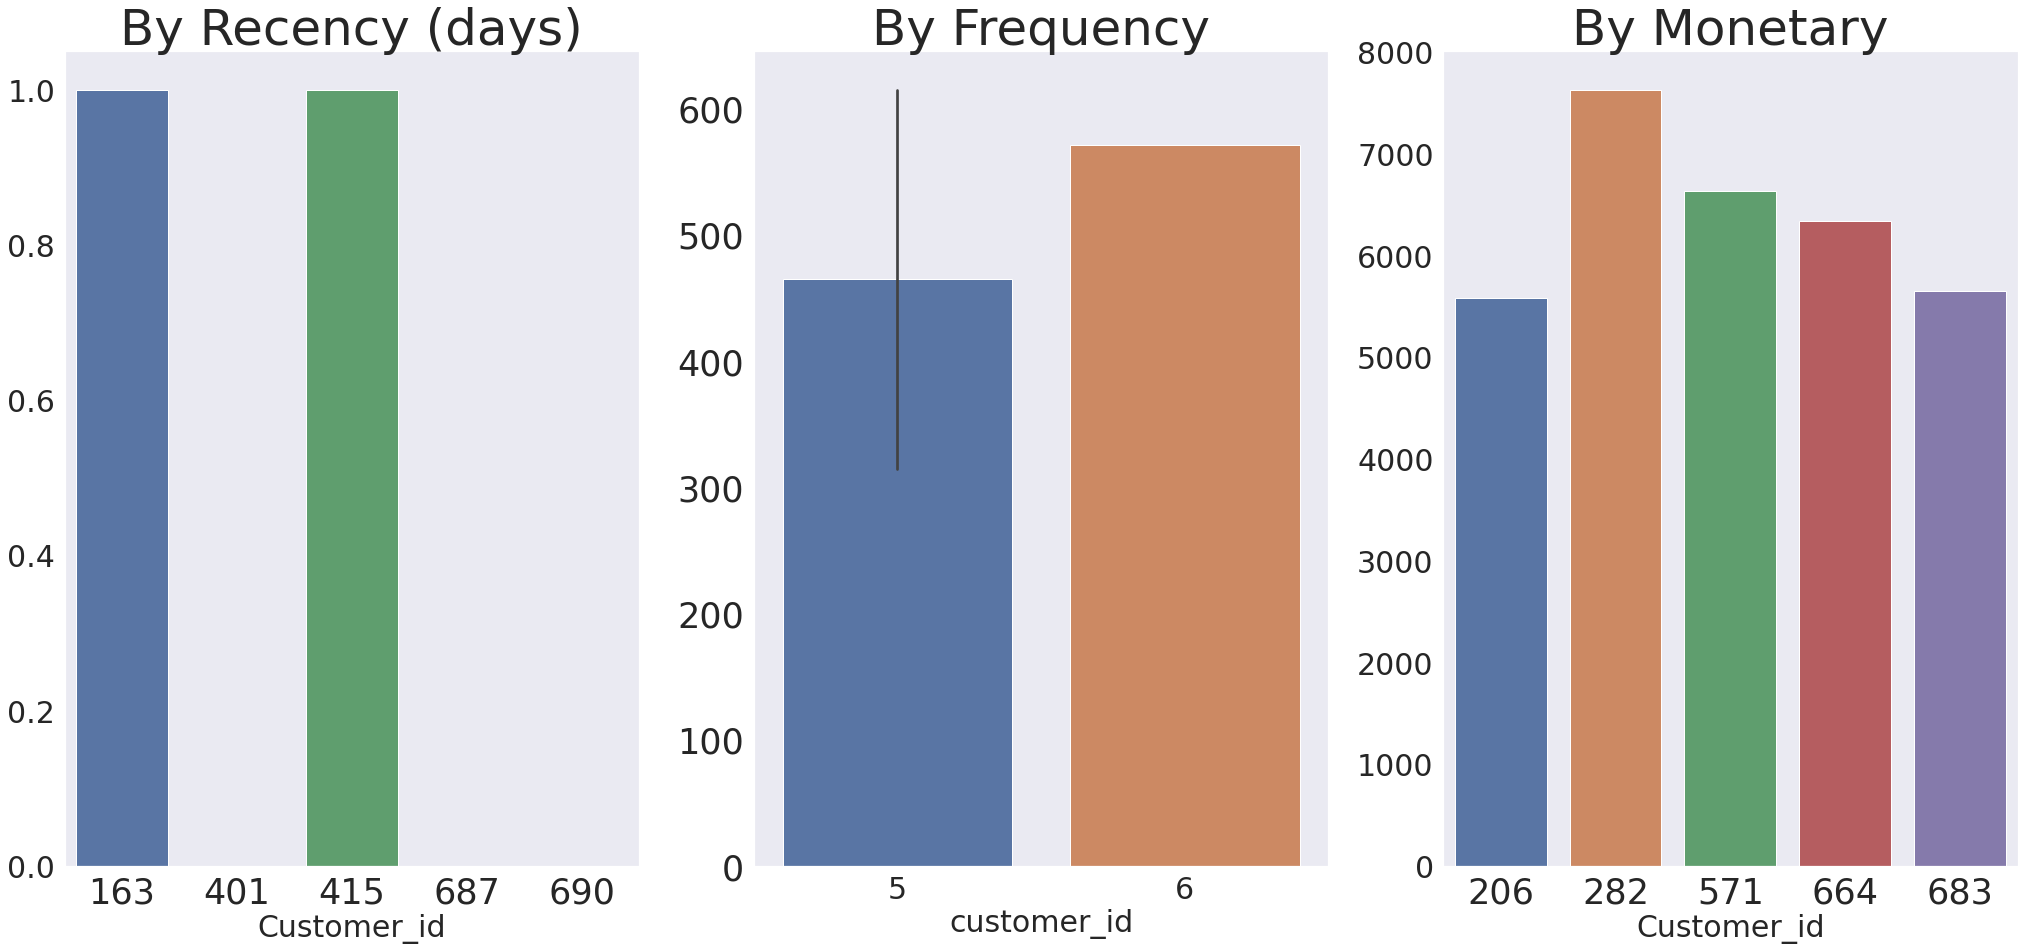

In [16]:
st.subheader('Best Customer Based on RFM Parameters')

col1, col2, col3 = st.columns(3)

with col1:
  avg_recency = round(rfm_df.recency.mean(), 1)
  st.metric('Average Recency (days)', value=avg_recency)

with col2:
  avg_frequency = round(rfm_df.frequency.mean(), 2)
  st.metric('Average Frequency', value=avg_frequency)

with col3:
  avg_frequency = format_currency(rfm_df.monetary.mean(), 'AUD', locale='es_CO')
  st.metric("Average Monetary", value=avg_frequency)

fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(35,15))

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(), ax=ax[0])
ax[0].set_title('By Recency (days)', loc='center', fontsize='50')
ax[0].set_ylabel(None)
ax[0].set_xlabel('Customer_id', fontsize=30)
ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=35)

sns.barplot(x='frequency', y='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), ax=ax[1])
ax[1].set_title('By Frequency', fontsize=50, loc='center')
ax[1].set_xlabel('customer_id', fontsize=30)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=30)
ax[1].tick_params(axis='y', labelsize=35)

sns.barplot(x='customer_id', y='monetary', data=rfm_df.sort_values(by='monetary', ascending=False).head(), ax=ax[2])
ax[2].set_title('By Monetary', fontsize=50)
ax[2].set_xlabel('Customer_id', fontsize=30)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='x', labelsize=35)
ax[2].tick_params(axis='y', labelsize=30)

st.pyplot(fig)

st.caption('Copyright (c) Dicoding 2023')
